# Continuité Uniforme et Applications au Deep Learning
## Illustrations et Applications Pratiques

Ce notebook illustre les concepts de continuité uniforme, fonctions lipschitziennes, et leurs applications au machine learning (fonctions de perte et d'activation).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.special import expit  # sigmoid
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

np.random.seed(42)

## 1. Continuité Uniforme vs Continuité Simple

In [12]:
print("=== Continuité Uniforme ===")
print("\nDéfinition :")
print("  f est UNIFORMÉMENT continue si :")
print("  ∀ε > 0, ∃δ > 0, ∀x,y ∈ X : |x-y| < δ ⟹ |f(x)-f(y)| < ε")
print("\nDifférence avec la continuité simple :")
print("  • Continuité simple : δ dépend de ε ET du point x₀")
print("  • Continuité UNIFORME : δ dépend UNIQUEMENT de ε (même δ pour tous les points)")

# Exemple 1.14 : Continue mais PAS uniformément continue
def f_non_uniforme(x):
    """f(x) = x² sur ℝ : continue mais pas uniformément continue"""
    return x**2

# Exemple 1.15 : Uniformément continue
def f_uniforme(x):
    """f(x) = x² sur [0,1] : uniformément continue (compact)"""
    return x**2

print("\n=== Exemple 1.14 : f(x) = x² sur ℝ ===")
print("\nf est CONTINUE partout, mais PAS uniformément continue")
print("\nPreuve : Pour x grand, la pente f'(x) = 2x devient arbitrairement grande")
print("On peut toujours trouver x et y proches tels que |f(x) - f(y)| > ε")

# Démonstration numérique
epsilon = 1.0
x_values = [1, 10, 100, 1000]
delta = 0.1

print(f"\nTest avec ε = {epsilon}, δ = {delta} :")
print(f"\n{'x':>8} {'y=x+δ':>10} {'|f(x)-f(y)|':>15} {'< ε ?':>10}")
print("-" * 50)
for x in x_values:
    y = x + delta
    diff = abs(f_non_uniforme(x) - f_non_uniforme(y))
    check = "✓" if diff < epsilon else "✗"
    print(f"{x:8.0f} {y:10.1f} {diff:15.2f} {check:>10}")

print(f"\nConclusion : Pour x grand, même avec δ = {delta}, |f(x)-f(y)| > {epsilon}")
print("Donc f(x) = x² n'est PAS uniformément continue sur ℝ")

print("\n=== Exemple 1.15 : f(x) = x² sur [0,1] ===")
print("\nSur un intervalle COMPACT [0,1], f est uniformément continue")
print("(Théorème de Heine)")

# Sur [0,1], la dérivée max est f'(1) = 2
print("\nPour ε > 0, on peut choisir δ = ε/2 :")
print("Si |x - y| < δ, alors |x² - y²| = |x+y||x-y| ≤ 2|x-y| < 2δ = ε")

=== Continuité Uniforme ===

Définition :
  f est UNIFORMÉMENT continue si :
  ∀ε > 0, ∃δ > 0, ∀x,y ∈ X : |x-y| < δ ⟹ |f(x)-f(y)| < ε

Différence avec la continuité simple :
  • Continuité simple : δ dépend de ε ET du point x₀
  • Continuité UNIFORME : δ dépend UNIQUEMENT de ε (même δ pour tous les points)

=== Exemple 1.14 : f(x) = x² sur ℝ ===

f est CONTINUE partout, mais PAS uniformément continue

Preuve : Pour x grand, la pente f'(x) = 2x devient arbitrairement grande
On peut toujours trouver x et y proches tels que |f(x) - f(y)| > ε

Test avec ε = 1.0, δ = 0.1 :

       x      y=x+δ     |f(x)-f(y)|      < ε ?
--------------------------------------------------
       1        1.1            0.21          ✓
      10       10.1            2.01          ✗
     100      100.1           20.01          ✗
    1000     1000.1          200.01          ✗

Conclusion : Pour x grand, même avec δ = 0.1, |f(x)-f(y)| > 1.0
Donc f(x) = x² n'est PAS uniformément continue sur ℝ

=== Exemple 1.15 : 

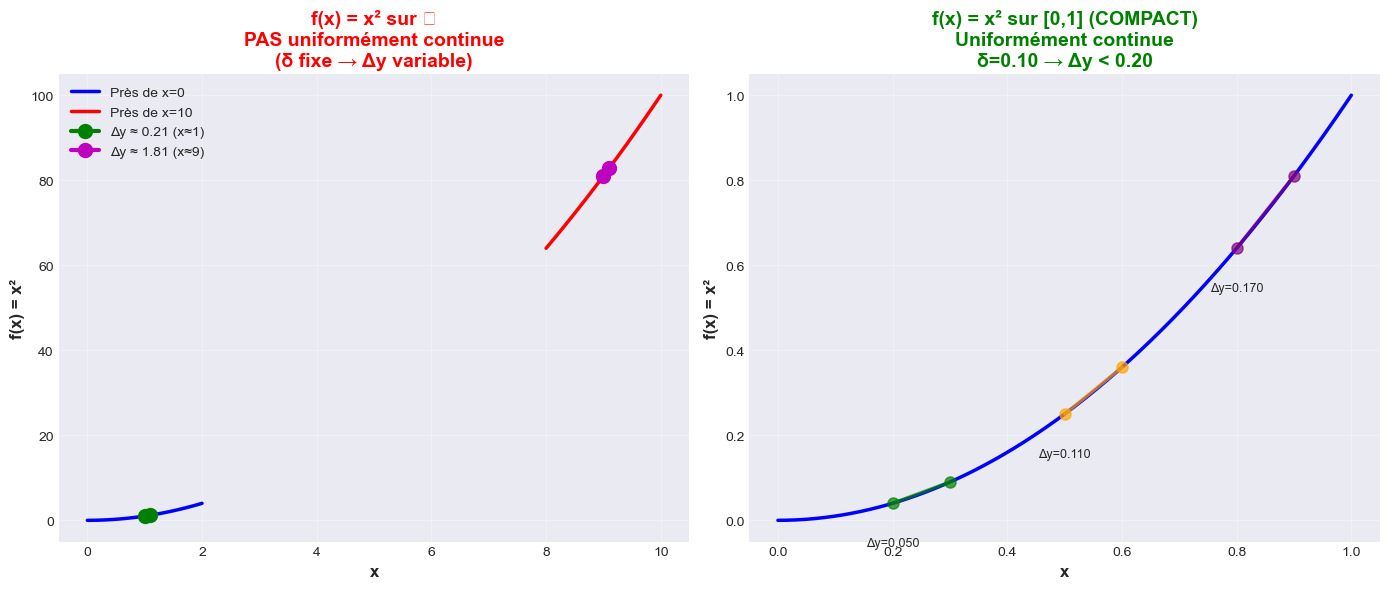


=== Théorème de Heine ===

Toute fonction CONTINUE sur un COMPACT est uniformément continue

Conséquence : Sur [a,b], toute fonction continue est uniformément continue


In [13]:
# Visualisation de la continuité uniforme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1: f(x) = x² sur ℝ (zoom sur différentes régions)
x1 = np.linspace(0, 2, 100)
x2 = np.linspace(8, 10, 100)

ax1.plot(x1, f_non_uniforme(x1), 'b-', linewidth=2.5, label='Près de x=0')
ax1.plot(x2, f_non_uniforme(x2), 'r-', linewidth=2.5, label='Près de x=10')

# Montrer que pour le même δ, la variation est différente
delta = 0.1
x_test1 = 1.0
x_test2 = 9.0

ax1.plot([x_test1, x_test1 + delta], [f_non_uniforme(x_test1), f_non_uniforme(x_test1 + delta)], 
        'go-', linewidth=3, markersize=10, label=f'Δy ≈ {abs(f_non_uniforme(x_test1) - f_non_uniforme(x_test1 + delta)):.2f} (x≈1)')
ax1.plot([x_test2, x_test2 + delta], [f_non_uniforme(x_test2), f_non_uniforme(x_test2 + delta)], 
        'mo-', linewidth=3, markersize=10, label=f'Δy ≈ {abs(f_non_uniforme(x_test2) - f_non_uniforme(x_test2 + delta)):.2f} (x≈9)')

ax1.set_xlabel('x', fontweight='bold', fontsize=12)
ax1.set_ylabel('f(x) = x²', fontweight='bold', fontsize=12)
ax1.set_title('f(x) = x² sur ℝ\nPAS uniformément continue\n(δ fixe → Δy variable)', 
             fontweight='bold', fontsize=14, color='red')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)

# Graphique 2: f(x) = x² sur [0,1]
x_compact = np.linspace(0, 1, 1000)
ax2.plot(x_compact, f_uniforme(x_compact), 'b-', linewidth=2.5)

# Montrer l'uniformité
epsilon = 0.2
delta = epsilon / 2

test_points = [0.2, 0.5, 0.8]
colors = ['green', 'orange', 'purple']
for x, color in zip(test_points, colors):
    y = min(x + delta, 1.0)
    ax2.plot([x, y], [f_uniforme(x), f_uniforme(y)], 
            'o-', color=color, linewidth=2.5, markersize=8, alpha=0.7)
    diff = abs(f_uniforme(x) - f_uniforme(y))
    ax2.text(x, f_uniforme(x) - 0.1, f'Δy={diff:.3f}', fontsize=9, ha='center')

ax2.set_xlabel('x', fontweight='bold', fontsize=12)
ax2.set_ylabel('f(x) = x²', fontweight='bold', fontsize=12)
ax2.set_title(f'f(x) = x² sur [0,1] (COMPACT)\nUniformément continue\nδ={delta:.2f} → Δy < {epsilon:.2f}', 
             fontweight='bold', fontsize=14, color='green')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([-0.05, 1.05])

plt.tight_layout()
plt.savefig('continuite_uniforme.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Théorème de Heine ===")
print("\nToute fonction CONTINUE sur un COMPACT est uniformément continue")
print("\nConséquence : Sur [a,b], toute fonction continue est uniformément continue")

## 2. Continuité Lipschitzienne

In [14]:
print("=== Continuité Lipschitzienne ===")
print("\nDéfinition :")
print("  f est L-Lipschitzienne si :")
print("  |f(x) - f(y)| ≤ L·|x - y| pour tous x, y")
print("  |f(x) - f(y)| /|x-y| ≤ L pour tous x, y")
print("\nHiérarchie :")
print("  Lipschitz ⟹ Uniformément continue ⟹ Continue")
print("  (Les réciproques sont FAUSSES en général)")

# Fonctions d'exemple
def identite(x):
    return x

def sinus(x):
    return np.sin(x)

def racine(x):
    return np.sqrt(np.maximum(x, 0))

def carre_compact(x):
    return x**2

print("\n=== Exemple 1.16 : Exemples de fonctions ===")
print("\n1. f(x) = x (identité)")
print("   |f(x) - f(y)| = |x - y|")
print("   → 1-Lipschitz (L = 1)")

print("\n2. f(x) = sin(x)")
print("   |sin(x) - sin(y)| ≤ |x - y| (car |cos(z)| ≤ 1)")
print("   → 1-Lipschitz (L = 1)")

print("\n3. f(x) = √x sur [0, ∞)")
print("   PAS Lipschitz (dérivée infinie en 0)")
print("   f'(x) = 1/(2√x) → ∞ quand x → 0⁺")

print("\n4. f(x) = x² sur [0,1]")
print("   |f'(x)| = |2x| ≤ 2 sur [0,1]")
print("   → 2-Lipschitz (L = 2)")

# Vérification numérique de la constante de Lipschitz
def constante_lipschitz_empirique(f, x_min, x_max, n_points=1000):
    """Estime la constante de Lipschitz empiriquement"""
    x = np.linspace(x_min, x_max, n_points)
    y = f(x)
    
    # Calculer toutes les pentes
    ratios = []
    for i in range(len(x)):
        for j in range(i+1, min(i+50, len(x))):  # Limiter pour la performance
            if x[j] != x[i]:
                ratio = abs(y[j] - y[i]) / abs(x[j] - x[i])
                ratios.append(ratio)
    
    return max(ratios) if ratios else 0

print("\n=== Vérification Empirique ===")
print(f"\nConstante de Lipschitz empirique :")
print(f"  • f(x) = x      sur [0,10]  : L ≈ {constante_lipschitz_empirique(identite, 0, 10):.4f}")
print(f"  • f(x) = sin(x) sur [0,2π]  : L ≈ {constante_lipschitz_empirique(sinus, 0, 2*np.pi):.4f}")
print(f"  • f(x) = x²     sur [0,1]   : L ≈ {constante_lipschitz_empirique(carre_compact, 0, 1):.4f}")
print(f"  • f(x) = √x     sur [0.01,1]: L ≈ {constante_lipschitz_empirique(racine, 0.01, 1):.4f}")
print(f"  • f(x) = √x     sur [0,1]   : L ≈ {constante_lipschitz_empirique(racine, 1e-6, 1):.1f} (tend vers ∞!)")

=== Continuité Lipschitzienne ===

Définition :
  f est L-Lipschitzienne si :
  |f(x) - f(y)| ≤ L·|x - y| pour tous x, y
  |f(x) - f(y)| /|x-y| ≤ L pour tous x, y

Hiérarchie :
  Lipschitz ⟹ Uniformément continue ⟹ Continue
  (Les réciproques sont FAUSSES en général)

=== Exemple 1.16 : Exemples de fonctions ===

1. f(x) = x (identité)
   |f(x) - f(y)| = |x - y|
   → 1-Lipschitz (L = 1)

2. f(x) = sin(x)
   |sin(x) - sin(y)| ≤ |x - y| (car |cos(z)| ≤ 1)
   → 1-Lipschitz (L = 1)

3. f(x) = √x sur [0, ∞)
   PAS Lipschitz (dérivée infinie en 0)
   f'(x) = 1/(2√x) → ∞ quand x → 0⁺

4. f(x) = x² sur [0,1]
   |f'(x)| = |2x| ≤ 2 sur [0,1]
   → 2-Lipschitz (L = 2)

=== Vérification Empirique ===

Constante de Lipschitz empirique :
  • f(x) = x      sur [0,10]  : L ≈ 1.0000
  • f(x) = sin(x) sur [0,2π]  : L ≈ 1.0000
  • f(x) = x²     sur [0,1]   : L ≈ 1.9990
  • f(x) = √x     sur [0.01,1]: L ≈ 4.8819
  • f(x) = √x     sur [0,1]   : L ≈ 30.6 (tend vers ∞!)


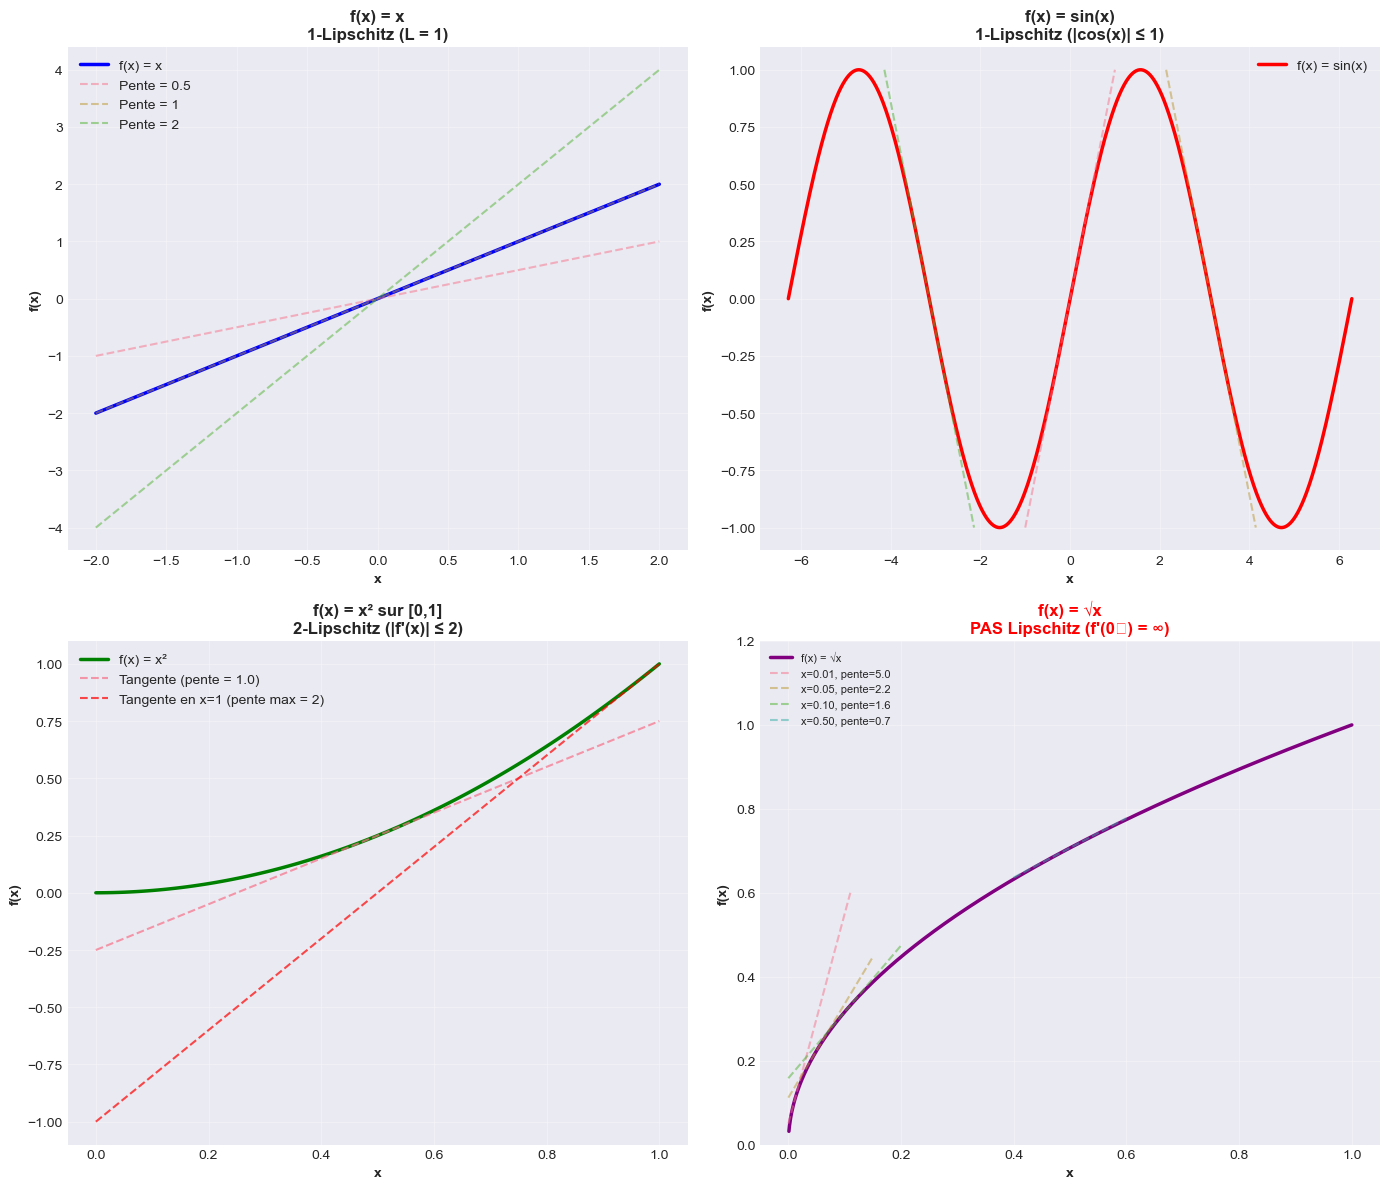


=== Proposition 1.6 ===

Si f : ℝⁿ → ℝᵐ est différentiable avec ||∇f(x)|| ≤ L pour tout x,
alors f est L-Lipschitz


In [15]:
# Visualisation des fonctions lipschitziennes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# f(x) = x (1-Lipschitz)
x = np.linspace(-2, 2, 100)
axes[0, 0].plot(x, identite(x), 'b-', linewidth=2.5, label='f(x) = x')
x0, y0 = 0, 0
for L in [0.5, 1, 2]:
    axes[0, 0].plot(x, y0 + L*(x - x0), '--', alpha=0.5, label=f'Pente = {L}')
axes[0, 0].set_xlabel('x', fontweight='bold')
axes[0, 0].set_ylabel('f(x)', fontweight='bold')
axes[0, 0].set_title('f(x) = x\n1-Lipschitz (L = 1)', fontweight='bold', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# f(x) = sin(x) (1-Lipschitz)
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
axes[0, 1].plot(x, sinus(x), 'r-', linewidth=2.5, label='f(x) = sin(x)')
# Tangentes aux points de pente maximale
for x0 in [0, np.pi, -np.pi]:
    y0 = np.sin(x0)
    slope = np.cos(x0)
    x_tan = np.linspace(x0-1, x0+1, 100)
    axes[0, 1].plot(x_tan, y0 + slope*(x_tan - x0), '--', alpha=0.5)
axes[0, 1].set_xlabel('x', fontweight='bold')
axes[0, 1].set_ylabel('f(x)', fontweight='bold')
axes[0, 1].set_title('f(x) = sin(x)\n1-Lipschitz (|cos(x)| ≤ 1)', fontweight='bold', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# f(x) = x² sur [0,1] (2-Lipschitz)
x = np.linspace(0, 1, 100)
axes[1, 0].plot(x, carre_compact(x), 'g-', linewidth=2.5, label='f(x) = x²')
# Montrer la pente maximale
x0 = 0.5
y0 = x0**2
slope_max = 2*1  # En x=1
x_tan = np.linspace(0, 1, 100)
axes[1, 0].plot(x_tan, y0 + 2*x0*(x_tan - x0), '--', alpha=0.7, 
               label=f'Tangente (pente = {2*x0:.1f})')
axes[1, 0].plot(x_tan, 1**2 + 2*1*(x_tan - 1), '--', alpha=0.7, color='red',
               label=f'Tangente en x=1 (pente max = 2)')
axes[1, 0].set_xlabel('x', fontweight='bold')
axes[1, 0].set_ylabel('f(x)', fontweight='bold')
axes[1, 0].set_title('f(x) = x² sur [0,1]\n2-Lipschitz (|f\'(x)| ≤ 2)', fontweight='bold', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# f(x) = √x (PAS Lipschitz)
x = np.linspace(0.001, 1, 1000)
axes[1, 1].plot(x, racine(x), 'purple', linewidth=2.5, label='f(x) = √x')
# Montrer que la pente devient infinie près de 0
for x0 in [0.01, 0.05, 0.1, 0.5]:
    y0 = np.sqrt(x0)
    slope = 1/(2*np.sqrt(x0))
    x_tan = np.linspace(max(0, x0-0.1), min(1, x0+0.1), 100)
    axes[1, 1].plot(x_tan, y0 + slope*(x_tan - x0), '--', alpha=0.5,
                   label=f'x={x0:.2f}, pente={slope:.1f}')
axes[1, 1].set_xlabel('x', fontweight='bold')
axes[1, 1].set_ylabel('f(x)', fontweight='bold')
axes[1, 1].set_title('f(x) = √x\nPAS Lipschitz (f\'(0⁺) = ∞)', 
                    fontweight='bold', fontsize=12, color='red')
axes[1, 1].legend(fontsize=8)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim([0, 1.2])

plt.tight_layout()
plt.savefig('fonctions_lipschitz.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Proposition 1.6 ===")
print("\nSi f : ℝⁿ → ℝᵐ est différentiable avec ||∇f(x)|| ≤ L pour tout x,")
print("alors f est L-Lipschitz")

## 3. Application 1.15 : Convergence de la Descente de Gradient

In [16]:
print("=== Application 1.15 : Convergence de la Descente de Gradient ===")
print("\nThéorème (simplifié) :")
print("  Si f est convexe et ∇f est L-Lipschitz,")
print("  alors la descente de gradient avec α = 1/L")
print("  converge vers le minimum à un taux O(1/k)")
print("\nLa constante L contrôle la VITESSE de convergence !")

# Fonction objectif simple : f(x) = (1/2)x^2
def f_simple(x):
    return 0.5 * x**2

def grad_f_simple(x):
    return x  # ∇f = x, donc L = 1

# Tester différents taux d'apprentissage
x0 = 10.0
n_iter = 50
L = 1.0  # Constante de Lipschitz

alphas = [1.5/L, 1.0/L, 0.5/L, 0.1/L]  # Différents taux
alpha_names = ['1.5/L (diverge)', '1/L (optimal)', '0.5/L', '0.1/L']

historiques = {}
for alpha, name in zip(alphas, alpha_names):
    x = x0
    hist = [x]
    for k in range(n_iter):
        x = x - alpha * grad_f_simple(x)
        hist.append(x)
        if abs(x) > 1e10:  # Divergence
            break
    historiques[name] = hist

print(f"\nPoint initial : x₀ = {x0}")
print(f"Constante de Lipschitz : L = {L}")
print(f"Taux optimal : α* = 1/L = {1/L}")
print("\nRésultats :")
for name, hist in historiques.items():
    if len(hist) > n_iter:
        print(f"  {name:20s} : x_{len(hist)-1} = {hist[-1]:10.6f}")
    else:
        print(f"  {name:20s} : DIVERGE après {len(hist)} itérations")

=== Application 1.15 : Convergence de la Descente de Gradient ===

Théorème (simplifié) :
  Si f est convexe et ∇f est L-Lipschitz,
  alors la descente de gradient avec α = 1/L
  converge vers le minimum à un taux O(1/k)

La constante L contrôle la VITESSE de convergence !

Point initial : x₀ = 10.0
Constante de Lipschitz : L = 1.0
Taux optimal : α* = 1/L = 1.0

Résultats :
  1.5/L (diverge)      : x_50 =   0.000000
  1/L (optimal)        : x_50 =   0.000000
  0.5/L                : x_50 =   0.000000
  0.1/L                : x_50 =   0.051538


In [ ]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1: Trajectoires
for name, hist in historiques.items():
    if len(hist) <= n_iter + 1:
        ax1.plot(range(len(hist)), hist, 'o-', linewidth=2, markersize=4, 
                label=name, alpha=0.7)

ax1.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Optimum x* = 0')
ax1.set_xlabel('Itération k', fontweight='bold', fontsize=12)
ax1.set_ylabel('xₖ', fontweight='bold', fontsize=12)
ax1.set_title('Descente de Gradient\nImpact du Taux d\'Apprentissage', 
             fontweight='bold', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([-15, 15])

# Graphique 2: Erreur en échelle log
for name, hist in historiques.items():
    if len(hist) <= n_iter + 1 and len(hist) > 5:
        erreurs = [abs(x) for x in hist]
        ax2.semilogy(range(len(erreurs)), erreurs, 'o-', linewidth=2, 
                    markersize=4, label=name, alpha=0.7)

# Ligne de référence O(1/k)
k = np.arange(1, n_iter+1)
ax2.semilogy(k, x0/k, 'k--', linewidth=2, label='O(1/k)', alpha=0.5)

ax2.set_xlabel('Itération k', fontweight='bold', fontsize=12)
ax2.set_ylabel('|xₖ - x*| (échelle log)', fontweight='bold', fontsize=12)
ax2.set_title('Convergence avec α = 1/L\nTaux O(1/k)', 
             fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/convergence_lipschitz.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nConclusion :")
print("  • α > 1/L : DIVERGENCE")
print("  • α = 1/L : Convergence OPTIMALE")
print("  • α < 1/L : Convergence mais plus LENTE")

## 4. Fonctions de Perte en Machine Learning

In [ ]:
print("=== Fonctions de Perte en Machine Learning ===")
print("\nLa fonction de perte L(θ) mesure l'erreur du modèle")
print("\nPropriétés souhaitables :")
print("  • CONTINUITÉ : petites variations θ → petites variations L")
print("  • DIFFÉRENTIABILITÉ : pour optimiser par gradient")
print("  • CONVEXITÉ : garantit unique minimum global")

# Définir les fonctions de perte
def mse_loss(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred)**2)

def cross_entropy_loss(y_true, p_pred):
    """Binary Cross-Entropy"""
    epsilon = 1e-15
    p_pred = np.clip(p_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(p_pred) + (1 - y_true) * np.log(1 - p_pred))

def hinge_loss(y_true, y_pred):
    """Hinge Loss (SVM) - y_true ∈ {-1, 1}"""
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

def mae_loss(y_true, y_pred):
    """Mean Absolute Error"""
    return np.mean(np.abs(y_true - y_pred))

print("\n=== Exemple 1.17 : Mean Squared Error (MSE) ===")
print("\nL(θ) = (1/n)Σ(yᵢ - f_θ(xᵢ))²")
print("\nPropriétés :")
print("  ✓ Continue si f_θ continue en θ")
print("  ✓ Différentiable si f_θ différentiable")
print("  ✓ Convexe si f_θ affine en θ (régression linéaire)")

print("\n=== Exemple 1.18 : Cross-Entropy ===")
print("\nL(θ) = -(1/n)Σ[yᵢ log(p_θ(xᵢ)) + (1-yᵢ)log(1-p_θ(xᵢ))]")
print("\nPropriétés :")
print("  ✓ Continue pour p ∈ (0,1)")
print("  ✓ Différentiable")
print("  ✓ Convexe pour régression logistique")

print("\n=== Exemple 1.19 : Hinge Loss (SVM) ===")
print("\nL(θ) = (1/n)Σ max(0, 1 - yᵢ·θᵀxᵢ)")
print("\nPropriétés :")
print("  ✓ Continue partout")
print("  ✗ Non différentiable en θᵀxᵢ = yᵢ (mais sous-différentiable)")
print("  ✓ Convexe")

In [ ]:
# Visualisation des fonctions de perte
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Pour régression : erreur en fonction de la prédiction
y_true = 0  # Vrai label
predictions = np.linspace(-3, 3, 1000)

# MSE
mse_values = [(p - y_true)**2 for p in predictions]
axes[0, 0].plot(predictions, mse_values, 'b-', linewidth=2.5)
axes[0, 0].axvline(x=y_true, color='r', linestyle='--', linewidth=2, label='Vraie valeur')
axes[0, 0].scatter([y_true], [0], c='red', s=200, zorder=5, edgecolors='black', linewidth=2)
axes[0, 0].set_xlabel('Prédiction ŷ', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('MSE Loss', fontweight='bold', fontsize=12)
axes[0, 0].set_title('Mean Squared Error\n(y - ŷ)²\nContinue, Différentiable, Convexe', 
                    fontweight='bold', fontsize=13)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# MAE
mae_values = [abs(p - y_true) for p in predictions]
axes[0, 1].plot(predictions, mae_values, 'g-', linewidth=2.5)
axes[0, 1].axvline(x=y_true, color='r', linestyle='--', linewidth=2, label='Vraie valeur')
axes[0, 1].scatter([y_true], [0], c='red', s=200, zorder=5, edgecolors='black', linewidth=2)
axes[0, 1].set_xlabel('Prédiction ŷ', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('MAE Loss', fontweight='bold', fontsize=12)
axes[0, 1].set_title('Mean Absolute Error\n|y - ŷ|\nContinue, NON Lisse, Convexe', 
                    fontweight='bold', fontsize=13, color='orange')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Cross-Entropy (classification binaire y=1)
y_true_class = 1
probs = np.linspace(0.01, 0.99, 1000)
ce_values = [-y_true_class * np.log(p) for p in probs]

axes[1, 0].plot(probs, ce_values, 'r-', linewidth=2.5)
axes[1, 0].set_xlabel('Probabilité prédite p(y=1)', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Cross-Entropy Loss', fontweight='bold', fontsize=12)
axes[1, 0].set_title('Binary Cross-Entropy (y=1)\n-log(p)\nContinue, Différentiable, Convexe', 
                    fontweight='bold', fontsize=13)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim([0, 5])
axes[1, 0].annotate('Pénalité ∞\nsi p→0', xy=(0.05, 3), xytext=(0.3, 4),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2),
                   fontsize=11, color='red', fontweight='bold')

# Hinge Loss (SVM)
y_true_svm = 1  # +1 pour classe positive
margins = np.linspace(-2, 3, 1000)
hinge_values = [max(0, 1 - y_true_svm * m) for m in margins]

axes[1, 1].plot(margins, hinge_values, 'purple', linewidth=2.5)
axes[1, 1].axvline(x=1, color='g', linestyle='--', linewidth=2, label='Marge = 1')
axes[1, 1].scatter([1], [0], c='green', s=200, zorder=5, edgecolors='black', linewidth=2)
axes[1, 1].set_xlabel('Marge y·f(x)', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Hinge Loss', fontweight='bold', fontsize=12)
axes[1, 1].set_title('Hinge Loss (SVM)\nmax(0, 1-y·f(x))\nContinue, NON Différentiable en 1', 
                    fontweight='bold', fontsize=13, color='purple')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].annotate('Non différentiable\nau point anguleux', xy=(1, 0), xytext=(1.5, 0.5),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2),
                   fontsize=11, color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/fonctions_perte_ml.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Fonctions d'Activation

In [9]:
print("=== Fonctions d'Activation ===")
print("\nDans les réseaux de neurones, chaque neurone applique")
print("une fonction d'activation NON-LINÉAIRE")

# Définir les fonctions d'activation
def sigmoid(z):
    """Sigmoïde : σ(z) = 1/(1 + e^(-z))"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def tanh(z):
    """Tangente hyperbolique"""
    return np.tanh(z)

def relu(z):
    """ReLU : max(0, z)"""
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.01):
    """Leaky ReLU : max(αz, z)"""
    return np.where(z > 0, z, alpha * z)

def softmax(z):
    """Softmax pour vecteur"""
    exp_z = np.exp(z - np.max(z))  # Stabilité numérique
    return exp_z / np.sum(exp_z)

# Dérivées
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def leaky_relu_derivative(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

print("\n1. SIGMOÏDE : σ(z) = 1/(1 + e^(-z))")
print("   • Continue et différentiable sur ℝ")
print("   • σ'(z) = σ(z)(1 - σ(z))")
print("   • Sortie : (0, 1)")
print("   ✗ Problème : Saturation pour |z| grand (gradient → 0)")

print("\n2. TANH : tanh(z) = (e^z - e^(-z))/(e^z + e^(-z))")
print("   • Continue et différentiable")
print("   • Sortie : (-1, 1)")
print("   • Centrée en 0 (meilleur que sigmoïde)")
print("   ✗ Problème : Saturation aussi")

print("\n3. ReLU : max(0, z)")
print("   • Continue partout")
print("   ✗ Non différentiable en z = 0")
print("   • Dérivée : 1 si z > 0, 0 si z < 0")
print("   ✓ Pas de saturation pour z > 0")
print("   ✓ Calculs simples, convergence rapide")
print("   ✗ Problème : 'Neurones morts' (gradient = 0 si z < 0)")

print("\n4. LEAKY ReLU : max(αz, z) avec α ≈ 0.01")
print("   • Évite les neurones morts")
print("   • Petite pente pour z < 0")

print("\n5. SOFTMAX : softmax(z)ᵢ = e^(zᵢ) / Σⱼe^(zⱼ)")
print("   • Continue et différentiable")
print("   • Sortie : distribution de probabilité (Σ = 1)")
print("   • Utilisée pour classification multi-classes")

=== Fonctions d'Activation ===

Dans les réseaux de neurones, chaque neurone applique
une fonction d'activation NON-LINÉAIRE

1. SIGMOÏDE : σ(z) = 1/(1 + e^(-z))
   • Continue et différentiable sur ℝ
   • σ'(z) = σ(z)(1 - σ(z))
   • Sortie : (0, 1)
   ✗ Problème : Saturation pour |z| grand (gradient → 0)

2. TANH : tanh(z) = (e^z - e^(-z))/(e^z + e^(-z))
   • Continue et différentiable
   • Sortie : (-1, 1)
   • Centrée en 0 (meilleur que sigmoïde)
   ✗ Problème : Saturation aussi

3. ReLU : max(0, z)
   • Continue partout
   ✗ Non différentiable en z = 0
   • Dérivée : 1 si z > 0, 0 si z < 0
   ✓ Pas de saturation pour z > 0
   ✓ Calculs simples, convergence rapide
   ✗ Problème : 'Neurones morts' (gradient = 0 si z < 0)

4. LEAKY ReLU : max(αz, z) avec α ≈ 0.01
   • Évite les neurones morts
   • Petite pente pour z < 0

5. SOFTMAX : softmax(z)ᵢ = e^(zᵢ) / Σⱼe^(zⱼ)
   • Continue et différentiable
   • Sortie : distribution de probabilité (Σ = 1)
   • Utilisée pour classification multi

In [ ]:
# Visualisation des fonctions d'activation
z = np.linspace(-6, 6, 1000)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Sigmoïde
axes[0, 0].plot(z, sigmoid(z), 'b-', linewidth=2.5, label='σ(z)')
axes[0, 0].plot(z, sigmoid_derivative(z), 'r--', linewidth=2, label="σ'(z)")
axes[0, 0].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
axes[0, 0].axvline(x=0, color='gray', linestyle=':', alpha=0.5)
axes[0, 0].fill_between(z, 0, sigmoid_derivative(z), alpha=0.2, color='red')
axes[0, 0].set_xlabel('z', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('σ(z)', fontweight='bold', fontsize=12)
axes[0, 0].set_title('Sigmoïde\nSaturation pour |z| grand', fontweight='bold', fontsize=13)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].annotate('Gradient\n≈ 0', xy=(-5, sigmoid_derivative(-5)), xytext=(-4, 0.15),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2),
                   fontsize=10, color='red')

# Tanh
axes[0, 1].plot(z, tanh(z), 'g-', linewidth=2.5, label='tanh(z)')
axes[0, 1].plot(z, tanh_derivative(z), 'r--', linewidth=2, label="tanh'(z)")
axes[0, 1].axhline(y=0, color='gray', linestyle=':', alpha=0.5)
axes[0, 1].axvline(x=0, color='gray', linestyle=':', alpha=0.5)
axes[0, 1].fill_between(z, 0, tanh_derivative(z), alpha=0.2, color='red')
axes[0, 1].set_xlabel('z', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('tanh(z)', fontweight='bold', fontsize=12)
axes[0, 1].set_title('Tanh\nCentrée en 0, Saturation', fontweight='bold', fontsize=13)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# ReLU
axes[0, 2].plot(z, relu(z), 'purple', linewidth=2.5, label='ReLU(z)')
axes[0, 2].plot(z, relu_derivative(z), 'r--', linewidth=2, label="ReLU'(z)")
axes[0, 2].axhline(y=0, color='gray', linestyle=':', alpha=0.5)
axes[0, 2].axvline(x=0, color='gray', linestyle=':', alpha=0.5)
axes[0, 2].scatter([0], [0], c='red', s=200, zorder=5, edgecolors='black', linewidth=2)
axes[0, 2].set_xlabel('z', fontweight='bold', fontsize=12)
axes[0, 2].set_ylabel('ReLU(z)', fontweight='bold', fontsize=12)
axes[0, 2].set_title('ReLU\nNON différentiable en 0', fontweight='bold', fontsize=13, color='purple')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].annotate('Point\nanguleux', xy=(0, 0), xytext=(1.5, 1),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2),
                   fontsize=11, color='red', fontweight='bold')

# Leaky ReLU
axes[1, 0].plot(z, leaky_relu(z), 'orange', linewidth=2.5, label='Leaky ReLU(z)')
axes[1, 0].plot(z, leaky_relu_derivative(z), 'r--', linewidth=2, label="Leaky ReLU'(z)")
axes[1, 0].axhline(y=0, color='gray', linestyle=':', alpha=0.5)
axes[1, 0].axvline(x=0, color='gray', linestyle=':', alpha=0.5)
axes[1, 0].set_xlabel('z', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Leaky ReLU(z)', fontweight='bold', fontsize=12)
axes[1, 0].set_title('Leaky ReLU (α=0.01)\nÉvite neurones morts', fontweight='bold', fontsize=13)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Comparaison des 3 principales
axes[1, 1].plot(z, sigmoid(z), 'b-', linewidth=2.5, label='Sigmoïde', alpha=0.7)
axes[1, 1].plot(z, tanh(z), 'g-', linewidth=2.5, label='Tanh', alpha=0.7)
axes[1, 1].plot(z, relu(z), 'purple', linewidth=2.5, label='ReLU', alpha=0.7)
axes[1, 1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].set_xlabel('z', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Activation', fontweight='bold', fontsize=12)
axes[1, 1].set_title('Comparaison\nPrincipales Activations', fontweight='bold', fontsize=13)
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim([-1.5, 6])

# Softmax (exemple avec 3 classes)
z_values = np.linspace(-3, 3, 100)
z_input = np.array([z_values, np.zeros_like(z_values), -z_values])  # 3 classes
softmax_outputs = np.array([softmax(z_input[:, i]) for i in range(len(z_values))]).T

axes[1, 2].plot(z_values, softmax_outputs[0], 'b-', linewidth=2.5, label='Classe 1')
axes[1, 2].plot(z_values, softmax_outputs[1], 'g-', linewidth=2.5, label='Classe 2')
axes[1, 2].plot(z_values, softmax_outputs[2], 'r-', linewidth=2.5, label='Classe 3')
axes[1, 2].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
axes[1, 2].set_xlabel('z₁ (z₂=0, z₃=-z₁)', fontweight='bold', fontsize=12)
axes[1, 2].set_ylabel('Probabilité', fontweight='bold', fontsize=12)
axes[1, 2].set_title('Softmax\nDistribution de probabilité (Σ=1)', fontweight='bold', fontsize=13)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/fonctions_activation.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Théorème d'Approximation Universelle

In [ ]:
print("=== Théorème d'Approximation Universelle ===")
print("\nThéorème (Cybenko, 1989) :")
print("  Un réseau de neurones à UNE couche cachée avec fonction")
print("  d'activation sigmoïde peut approximer uniformément TOUTE")
print("  fonction continue sur un compact, avec précision arbitraire")
print("\nFormellement :")
print("  Pour toute f : [0,1]ⁿ → ℝ continue et ε > 0,")
print("  ∃ réseau g(x) = Σᵢ wᵢ σ(vᵢᵀx + bᵢ) tel que ||f - g||∞ < ε")
print("\nConséquence : Les réseaux de neurones sont des")
print("              approximateurs UNIVERSELS de fonctions continues")

# Démonstration simple : approximer une fonction avec un réseau
def fonction_cible(x):
    """Fonction à approximer : sin(2πx) sur [0,1]"""
    return np.sin(2 * np.pi * x)

def reseau_1_couche(x, weights, biases, output_weights):
    """Réseau à 1 couche cachée : g(x) = Σ wᵢ σ(vᵢx + bᵢ)"""
    hidden = sigmoid(weights * x[:, np.newaxis] + biases)
    return hidden @ output_weights

# Tester avec différents nombres de neurones
x_test = np.linspace(0, 1, 1000)
y_true = fonction_cible(x_test)

neuron_counts = [2, 5, 10, 20]
approximations = {}

np.random.seed(42)
for n_neurons in neuron_counts:
    # Paramètres aléatoires (en pratique, on optimiserait)
    weights = np.random.randn(n_neurons) * 10
    biases = np.random.randn(n_neurons) * 5
    output_weights = np.random.randn(n_neurons) * 2
    
    y_approx = reseau_1_couche(x_test, weights, biases, output_weights)
    
    # Normaliser pour avoir une meilleure approximation visuelle
    y_approx = (y_approx - y_approx.mean()) / y_approx.std() * y_true.std()
    
    approximations[n_neurons] = y_approx
    erreur = np.max(np.abs(y_true - y_approx))
    print(f"\n{n_neurons} neurones : ||f - g||∞ ≈ {erreur:.4f}")

print("\nNote : Avec optimisation (gradient descent), l'erreur serait bien plus petite")

In [ ]:
# Visualisation de l'approximation
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, (n_neurons, ax) in enumerate(zip(neuron_counts, axes.flat)):
    ax.plot(x_test, y_true, 'b-', linewidth=3, label='Fonction cible f(x)', alpha=0.7)
    ax.plot(x_test, approximations[n_neurons], 'r--', linewidth=2, 
           label=f'Approximation g(x)', alpha=0.8)
    
    erreur = np.max(np.abs(y_true - approximations[n_neurons]))
    
    ax.set_xlabel('x', fontweight='bold', fontsize=12)
    ax.set_ylabel('y', fontweight='bold', fontsize=12)
    ax.set_title(f'Réseau avec {n_neurons} neurones\n||f - g||∞ ≈ {erreur:.3f}', 
                fontweight='bold', fontsize=13)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([-2, 2])

plt.suptitle('Théorème d\'Approximation Universelle\nPlus de neurones → Meilleure approximation', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/approximation_universelle.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Importance en Deep Learning ===")
print("\n1. GARANTIE DE CONVERGENCE")
print("   Si L(θ) continue → algorithmes ont + de chances de converger")
print("\n2. STABILITÉ")
print("   Fonction continue → petite erreur sur θ → petite erreur sur L(θ)")
print("\n3. APPROXIMATION")
print("   Réseaux peuvent approximer toute fonction continue")
print("\n4. DIFFÉRENTIABILITÉ et BACKPROPAGATION")
print("   Continuité nécessaire (mais pas suffisante) pour différentiabilité")

## 7. Convexité

In [ ]:
print("=== Convexité ===")
print("\nDéfinition :")
print("  f est convexe si pour tous x, y et λ ∈ [0,1] :")
print("  f(λx + (1-λ)y) ≤ λf(x) + (1-λ)f(y)")
print("\nInterprétation géométrique :")
print("  Le segment joignant deux points du graphe")
print("  est AU-DESSUS du graphe")

print("\n=== Propriété 1.7 : Convexité et Minima ===")
print("\nPour une fonction CONVEXE :")
print("  • Tout minimum LOCAL est un minimum GLOBAL")
print("  • L'ensemble des minima est convexe")
print("\nConséquence : L'optimisation de fonctions convexes")
print("              est BEAUCOUP PLUS FACILE !")

# Exemples de fonctions convexes et non convexes
def f_convexe(x):
    """Fonction convexe : x²"""
    return x**2

def f_non_convexe(x):
    """Fonction non convexe : sin(x) + x²/10"""
    return np.sin(2*x) + x**2 / 10

print("\n=== Exemple 1.20 : Fonctions Convexes Courantes ===")
print("\n✓ Normes : ||·||_p convexes pour p ≥ 1")
print("✓ Exponentielles : e^x convexe")
print("✓ Formes quadratiques : x ↦ x^T A x convexe si A ⪰ 0")
print("✓ MSE : L(θ) = ||y - Xθ||₂² convexe en θ")
print("✓ Cross-entropy pour régression logistique : convexe en θ")

print("\n=== Exemple 1.21 : Fonctions NON Convexes ===")
print("\n✗ Réseaux de neurones profonds : généralement NON CONVEXE")
print("  à cause des non-linéarités et compositions")
print("\nConséquences :")
print("  • Plusieurs minima LOCAUX")
print("  • Initialisation des poids IMPORTANTE")
print("  • Optimisation plus DIFFICILE")

In [ ]:
# Visualisation de la convexité
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

x = np.linspace(-3, 3, 1000)

# Fonction convexe
ax1.plot(x, f_convexe(x), 'b-', linewidth=2.5, label='f(x) = x²')

# Montrer la propriété de convexité
x1, x2 = -2, 2
y1, y2 = f_convexe(x1), f_convexe(x2)
lambdas = [0.25, 0.5, 0.75]

for lam in lambdas:
    x_mid = lam * x1 + (1 - lam) * x2
    y_mid_segment = lam * y1 + (1 - lam) * y2  # Point sur le segment
    y_mid_func = f_convexe(x_mid)  # Point sur la fonction
    
    ax1.plot([x1, x2], [y1, y2], 'r--', linewidth=2, alpha=0.5)
    ax1.scatter([x_mid], [y_mid_segment], c='red', s=100, zorder=5, edgecolors='black')
    ax1.scatter([x_mid], [y_mid_func], c='blue', s=100, zorder=5, edgecolors='black')
    ax1.plot([x_mid, x_mid], [y_mid_func, y_mid_segment], 'g-', linewidth=2, alpha=0.7)

ax1.scatter([x1, x2], [y1, y2], c='black', s=150, zorder=5, marker='o')
ax1.annotate('f(λx+(1-λ)y)\n≤ λf(x)+(1-λ)f(y)', xy=(0, 2), xytext=(1, 5),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, color='green', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax1.set_xlabel('x', fontweight='bold', fontsize=12)
ax1.set_ylabel('f(x)', fontweight='bold', fontsize=12)
ax1.set_title('Fonction CONVEXE\nSegment au-dessus du graphe', 
             fontweight='bold', fontsize=14, color='green')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 10])

# Fonction non convexe
ax2.plot(x, f_non_convexe(x), 'r-', linewidth=2.5, label='f(x) = sin(2x) + x²/10')

# Trouver les minima locaux
from scipy.signal import find_peaks
minima_indices, _ = find_peaks(-f_non_convexe(x))
if len(minima_indices) > 0:
    ax2.scatter(x[minima_indices], f_non_convexe(x[minima_indices]), 
               c='blue', s=200, zorder=5, marker='v', edgecolors='black', linewidth=2,
               label='Minima locaux')

# Montrer que ce n'est pas convexe
x1, x2 = -2, 1
y1, y2 = f_non_convexe(x1), f_non_convexe(x2)
ax2.plot([x1, x2], [y1, y2], 'g--', linewidth=2, alpha=0.7, label='Segment')
ax2.scatter([x1, x2], [y1, y2], c='black', s=150, zorder=5, marker='o')

ax2.annotate('Plusieurs\nminima locaux', xy=(x[minima_indices[2]], f_non_convexe(x[minima_indices[2]])), 
            xytext=(1.5, 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, color='red', fontweight='bold')

ax2.set_xlabel('x', fontweight='bold', fontsize=12)
ax2.set_ylabel('f(x)', fontweight='bold', fontsize=12)
ax2.set_title('Fonction NON CONVEXE\nPlusieurs minima locaux', 
             fontweight='bold', fontsize=14, color='red')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/convexite.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Synthèse Finale - Module Complet

In [ ]:
print("="*80)
print("SYNTHÈSE COMPLÈTE : MODULE 1 - ANALYSE MATHÉMATIQUE POUR ML")
print("="*80)

print("\n" + "="*80)
print("CONCEPTS CLÉS MAÎTRISÉS")
print("="*80)

print("\n✓ ESPACES MÉTRIQUES")
print("  • Distance, norme, boule, topologie de base")
print("  • Normes L¹, L², L∞ et leurs applications")
print("  • Équivalence des normes en dimension finie")

print("\n✓ CONVERGENCE")
print("  • Suites convergentes : xₙ → x")
print("  • Séries : géométrique, exponentielle, harmonique")
print("  • Suites de Cauchy")
print("  • Convergence en probabilité et presque sûre")

print("\n✓ COMPLÉTUDE")
print("  • Espaces complets : ℝⁿ, C([a,b])")
print("  • Espaces de Banach (vectoriel normé complet)")
print("  • Espaces de Hilbert (produit scalaire complet)")
print("  • Projection orthogonale")

print("\n✓ CONTINUITÉ")
print("  • Continuité simple : δ dépend de ε ET de x₀")
print("  • Continuité UNIFORME : δ dépend UNIQUEMENT de ε")
print("  • Continuité LIPSCHITZ : |f(x)-f(y)| ≤ L|x-y|")
print("  • Hiérarchie : Lipschitz ⟹ Uniforme ⟹ Continue")

print("\n" + "="*80)
print("THÉORÈMES FONDAMENTAUX")
print("="*80)

print("\n1. Équivalence des normes (dimension finie)")
print("   → Toutes les normes sur ℝⁿ sont équivalentes")

print("\n2. Théorème des Valeurs Intermédiaires (TVI)")
print("   → f continue sur [a,b], f(a)·f(b) < 0 ⟹ ∃c : f(c) = 0")
print("   → Application : Algorithme de dichotomie O(log(1/ε))")

print("\n3. Théorème de Weierstrass (Bornes atteintes)")
print("   → f continue sur compact K ⟹ f atteint min et max")
print("   → Application : Existence de solutions optimales")

print("\n4. Théorème de Heine")
print("   → f continue sur compact ⟹ f uniformément continue")

print("\n5. Théorème d'Approximation Universelle (Cybenko)")
print("   → Réseau 1 couche cachée peut approximer toute f continue")
print("   → Précision arbitraire sur compact")

print("\n6. Inégalité de Cauchy-Schwarz")
print("   → |⟨x,y⟩| ≤ ||x|| · ||y||")

print("\n" + "="*80)
print("APPLICATIONS AU MACHINE LEARNING")
print("="*80)

print("\n1. ESPACES DE PARAMÈTRES")
print("   • Modèle ML → θ ∈ ℝᵐ")
print("   • Convergence : θ^(k) → θ* (optimum)")

print("\n2. RÉGULARISATION")
print("   • L2 (Ridge) : ||θ||₂² → paramètres petits")
print("   • L1 (LASSO) : ||θ||₁ → parcimonie (sélection features)")

print("\n3. FONCTIONS DE PERTE")
print("   • MSE : Continue, différentiable, convexe (régression linéaire)")
print("   • Cross-Entropy : Continue, différentiable, convexe (logistique)")
print("   • Hinge Loss : Continue, NON différentiable, convexe (SVM)")

print("\n4. FONCTIONS D'ACTIVATION")
print("   • Sigmoïde : Continue, différentiable, saturation")
print("   • Tanh : Continue, différentiable, centrée en 0")
print("   • ReLU : Continue, NON différentiable en 0, pas saturation")
print("   • Leaky ReLU : Évite neurones morts")
print("   • Softmax : Distribution de probabilité")

print("\n5. CONVERGENCE DESCENTE DE GRADIENT")
print("   • Si ∇f est L-Lipschitz, α = 1/L optimal")
print("   • Taux de convergence : O(1/k)")
print("   • L contrôle la VITESSE de convergence")

print("\n6. CONVEXITÉ")
print("   • Fonction convexe : minimum local = minimum global")
print("   • Régression linéaire : CONVEXE")
print("   • Réseaux profonds : NON CONVEXE → plusieurs minima locaux")

print("\n" + "="*80)
print("APPLICATIONS FINANCIÈRES")
print("="*80)

print("\n✓ Mesure de risque (normes)")
print("✓ Diversification de portefeuille (||w||₂)")
print("✓ Distance entre stratégies d'investissement")
print("✓ Optimisation de portefeuille Markowitz (Weierstrass)")
print("✓ Convergence de prix vers équilibre (point fixe)")
print("✓ Modèles de prédiction avec régularisation")
print("✓ Rente perpétuelle (série géométrique)")

print("\n" + "="*80)
print("IMPORTANCE PRATIQUE")
print("="*80)

print("\n1. CONTINUITÉ des fonctions de perte")
print("   → Permet optimisation par descente de gradient")

print("\n2. COMPACITÉ de l'ensemble des contraintes")
print("   → Garantit existence de solution optimale")

print("\n3. CONVEXITÉ")
print("   → Optimisation facile, unique minimum global")

print("\n4. LIPSCHITZ continuity du gradient")
print("   → Contrôle la vitesse de convergence")
print("   → Permet choix optimal du taux d'apprentissage")

print("\n5. APPROXIMATION UNIVERSELLE")
print("   → Justifie l'utilisation des réseaux de neurones")
print("   → Garantit capacité d'approximation")

print("\n" + "="*80)
print("Notebooks créés :")
print("  1. distances_normes_metriques.ipynb")
print("  2. convergence_suites_series.ipynb")
print("  3. applications_ml_continuite.ipynb")
print("  4. continuite_uniforme_deep_learning.ipynb (ce fichier)")
print("\nFichiers générés dans ce notebook :")
print("  • continuite_uniforme.png")
print("  • fonctions_lipschitz.png")
print("  • convergence_lipschitz.png")
print("  • fonctions_perte_ml.png")
print("  • fonctions_activation.png")
print("  • approximation_universelle.png")
print("  • convexite.png")
print("="*80)

print("\n✅ MODULE 1 COMPLET : Bases mathématiques pour ML et Finance maîtrisées !")